In [1]:
import os
import matplotlib.pyplot as plt
import random
import math
from PIL import Image
import PIL.Image
# !sudo apt install imagemagick
# !pip install wand
# from wand.image import Image
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<BarContainer object of 65 artists>

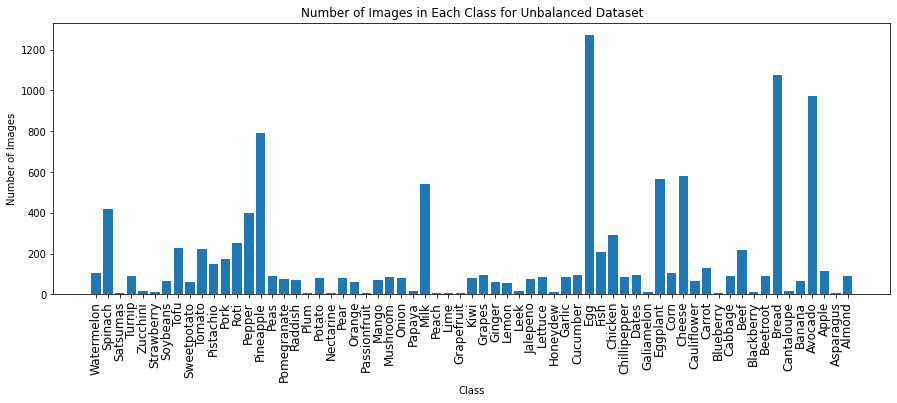

In [3]:
root = "/content/gdrive/MyDrive/University of Toronto/THIRD YEAR/WINTER SEM/APS360/APS360 Project/FinalDataset-Unbalanced"

classFolder = []
className = []
numImages = []
targetVal = 150

for folder in os.scandir(root):
  classFolder.append(folder)
  className.append(folder.name)
  numImages.append(len(os.listdir(folder.path)))

fig = plt.figure(figsize = (15,5))
plt.title("Number of Images in Each Class for Unbalanced Dataset")
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.bar(className, numImages)

In [20]:
#random deletion

for i in range(len(classFolder)):
  if numImages[i] > targetVal:
    for img in random.sample(os.listdir(classFolder[i].path), numImages[i] - targetVal):
      os.remove(classFolder[i].path + "/" + img)

  elif numImages[i] < targetVal:
   
    rotateCounter = 0
    hFlipCounter = 0
    vFlipCounter = 0
    noiseCounter = 0
    numGenerate = targetVal - numImages[i]

    while(numImages[i] != targetVal):
      for img in random.sample(os.listdir(classFolder[i].path), min((targetVal - numImages[i]), numImages[i])):
        openImg = PIL.Image.open(classFolder[i].path + "/" + img).convert('RGB')
        folder_path = classFolder[i].path

      #rotation
        if rotateCounter != math.floor(numGenerate * 0.33):
          rotateCounter += 1
          angle = random.randint(0, 180)
          newImg = openImg.rotate(angle = angle, expand = True, fillcolor = (255,255,255,0))
          newImg = newImg.resize((224, 224))
          randVal = random.uniform(0, 1000)
          newImg.save(r'newImg_' + str(className[i]) + 'rotated' + str(angle) + str(randVal) + '.jpg')
          shutil.move('/content/'+'newImg_' + str(className[i]) + 'rotated' + str(angle) + str(randVal)  + '.jpg', folder_path)

      #horizontal flip
        elif hFlipCounter != math.floor(numGenerate * 0.33):
          hFlipCounter += 1
          newImg = openImg.transpose(PIL.Image.FLIP_LEFT_RIGHT)
          randVal = random.uniform(0, 1000)
          newImg.save(r'newImg_' + str(className[i]) + 'hflip'+ str(randVal) + '.jpg')
          shutil.move('/content/'+'newImg_' + str(className[i]) + 'hflip'+ str(randVal) + '.jpg', folder_path)
          
      #vertical flip
        # elif vFlipCounter == math.floor(((numImages[i] - targetVal) * 0.33)):
        else:
          vFlipCounter += 1
          newImg = openImg.transpose(PIL.Image.FLIP_TOP_BOTTOM)
          randVal = random.uniform(0, 1000)
          newImg.save(r'newImg_' + str(className[i]) + 'vflip'+ str(randVal) + '.jpg')
          shutil.move('/content/'+'newImg_' + str(className[i]) + 'vflip'+ str(randVal) + '.jpg', folder_path)
        
        numImages[i] += 1
       
      # #adding noise
      #   else:
      #     noiseCounter += 1
      #     with open(classFolder[i].path + "/" + img, "rb") as img:
      #       with Image(file = img) as img:
      #         newImg = img.noise("gaussian")
      #         newImg.save('newImg_' + str(className[i]) + 'noise'+ str(i))

<BarContainer object of 65 artists>

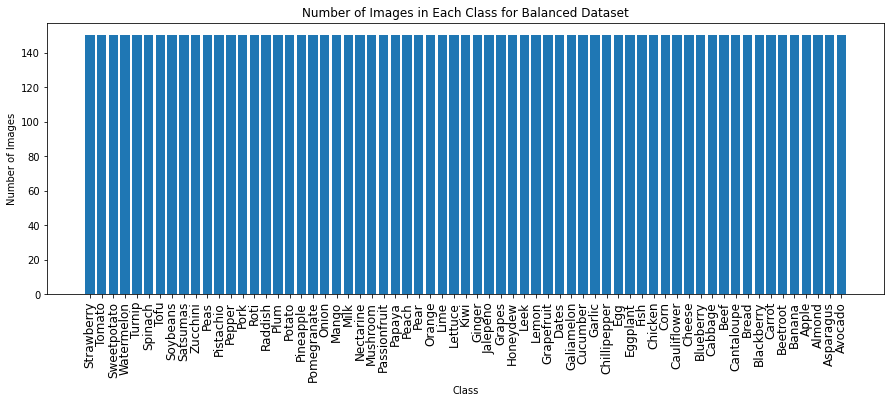

In [26]:
root = "/content/gdrive/MyDrive/University of Toronto/THIRD YEAR/WINTER SEM/APS360/APS360 Project/FinalDataset"

classFolder = []
className = []
numImages = []
targetVal = 150

for folder in os.scandir(root):
  classFolder.append(folder)
  className.append(folder.name)
  numImages.append(len(os.listdir(folder.path)))

fig = plt.figure(figsize = (15,5))
plt.title("Number of Images in Each Class for Balanced Dataset")
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.bar(className, numImages)

In [25]:
#removing rgba images and replacing it with rgb copy
for i in range(len(classFolder)):
  for img in os.listdir(classFolder[i].path):
    openImg = PIL.Image.open(classFolder[i].path + "/" + img)
    folder_path = classFolder[i].path
    if openImg.mode != 'RGB':
      newImg = openImg.convert('RGB')
      newImg.save(r'rgb' + str(img) + '.jpg')
      shutil.move('/content/'+'rgb' + str(img) + '.jpg', folder_path)
      os.remove(classFolder[i].path + "/" + img)
      